# Julia Sets Project

This project explores the visualization of Julia sets for complex polynomials through Python programming. The tasks include identifying fixed points, approximating Julia sets, and creating visualizations using different methods.

## Project Structure

### 1. Non-Attractive Fixed Point
We find non-attractive fixed points for the polynomial \( p(z) = z^2 + c \). These points are used as the starting point for generating the Julia set approximation.

**Function:**

### What is a Julia Set?

A **Julia set** is a mathematical fractal that visualizes the behavior of a complex function \( f(z) = z^2 + c \), where \( c \) is a complex parameter. It represents the boundary between points in the complex plane that escape to infinity and those that remain bounded under repeated iteration of the function. Julia sets are known for their intricate, self-similar patterns and are widely studied in the field of complex dynamics and fractal geometry.


In [37]:
def non_attractive_fixed_point(c):
    # Fixed points of z^2 + c satisfy z^2 - z + c = 0
    roots = np.roots([1, 0, c])  # Solving z^2 + c = z for fixed points
    fixed_points = [z for z in roots if abs(2*z) >= 1]  # Non-attractive condition
    return fixed_points[0] if fixed_points else None

### 2. Julia Set Approximation
We then approximate the Julia set \( J_N(p) \) using the fixed point.

**Function:**

In [38]:
def julia_set_approximation(c, N):
    fixed_point = non_attractive_fixed_point(c)
    if fixed_point is None:
        raise ValueError("No non-attractive fixed point found.")

    points = [fixed_point]
    for _ in range(N):
        new_points = []
        for z in points:
            new_points.extend([np.sqrt(z - c), -np.sqrt(z - c)])
        points.extend(new_points)
    return points


### 3. Plot Julia Set
Let's visualize the Julia set using scatter plots.

**Function:**

In [39]:
def plot_julia_set(c, N):
    points = julia_set_approximation(c, N)
    plt.figure(figsize=(8, 8))
    plt.scatter([z.real for z in points], [z.imag for z in points], s=1, color='blue')
    plt.title(f"Julia Set Approximation for c = {c}")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    plt.show()

### 4. Visualize Julia Set with Imshow
Grid-based approach for a detailed visualization.

**Function:**

In [40]:
def imshow_julia_set(c, N, resolution=500):
    points = julia_set_approximation(c, N)
    x_min, x_max, y_min, y_max = -2, 2, -2, 2
    grid = np.zeros((resolution, resolution))
    
    for z in points:
        x, y = int((z.real - x_min) / (x_max - x_min) * resolution), int((z.imag - y_min) / (y_max - y_min) * resolution)
        if 0 <= x < resolution and 0 <= y < resolution:
            grid[y, x] = 1

    plt.figure(figsize=(8, 8))
    plt.imshow(grid, extent=(x_min, x_max, y_min, y_max), cmap='binary')
    plt.title(f"Julia Set Visualization for c = {c}")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    plt.show()

### 5. Generalized Julia Set for Any Polynomial
An extended version of the algorithm to work with any polynomial.

In [41]:
def generalized_julia_set(polynomial_coeffs, N):
    polynomial = np.poly1d(polynomial_coeffs)
    derivative = polynomial.deriv()

    # Find non-attractive fixed points
    fixed_points = np.roots(polynomial - np.poly1d([1, 0]))
    fixed_point = next((z for z in fixed_points if abs(derivative(z)) >= 1), None)

    if fixed_point is None:
        raise ValueError("No non-attractive fixed point found.")

    points = [fixed_point]
    for _ in range(N):
        new_points = []
        for z in points:
            new_points.extend(np.roots([1] + [-z] + polynomial_coeffs))
        points.extend(new_points)
    return points

## Example Usage
Visualizing the Julia sets for various values of \( c \):

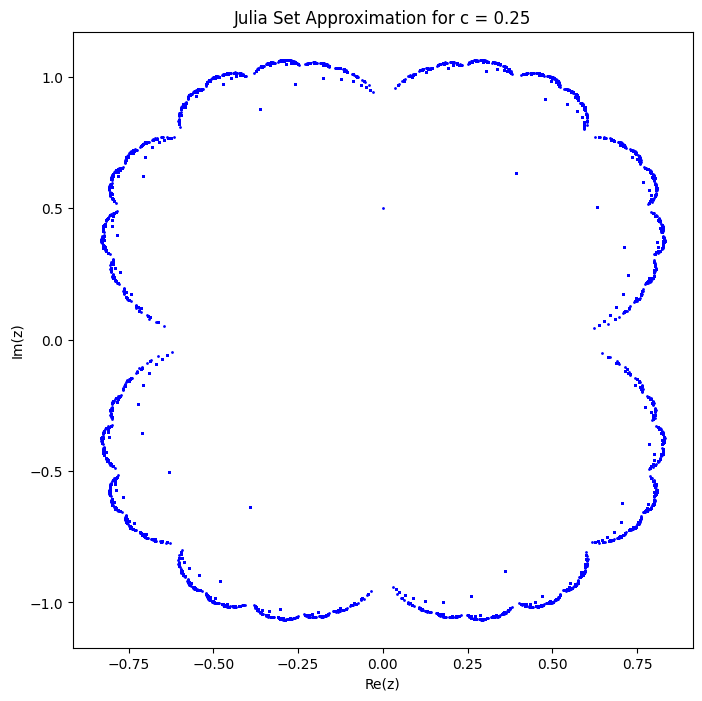

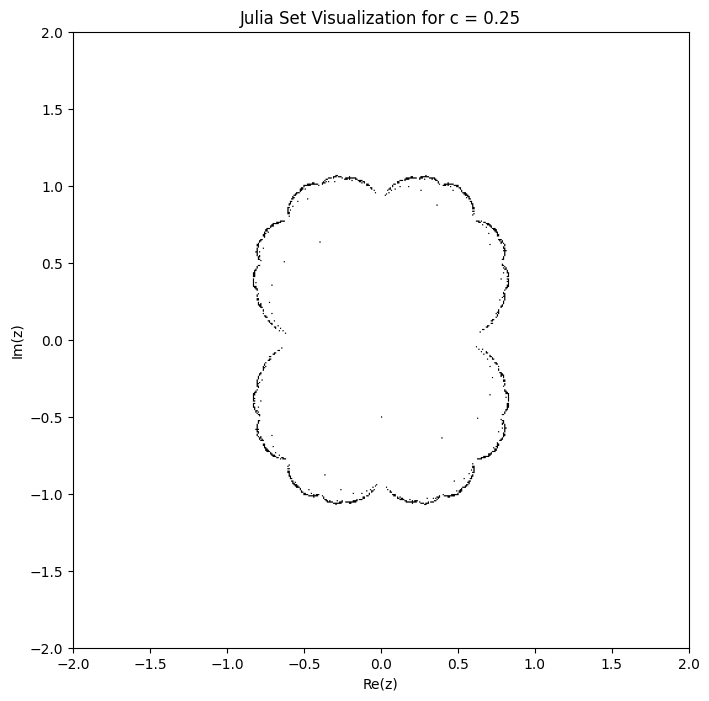

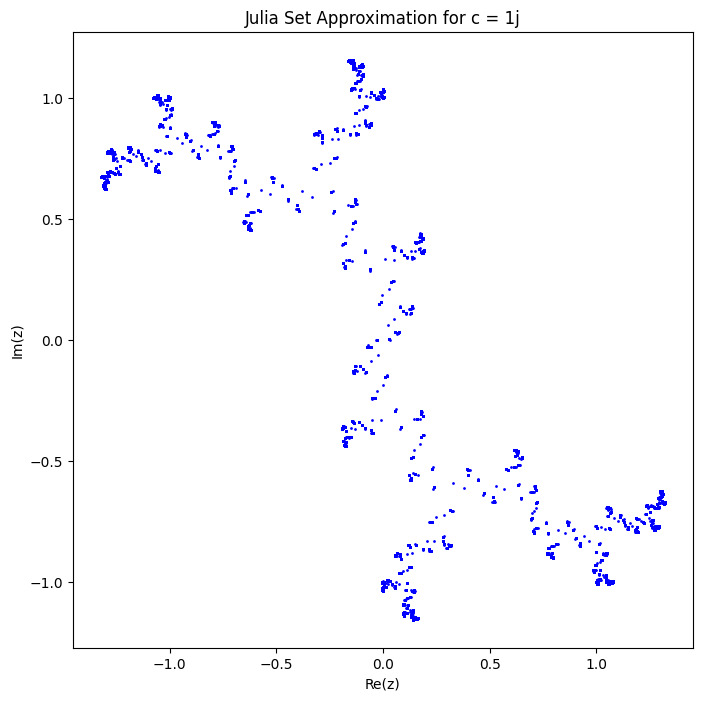

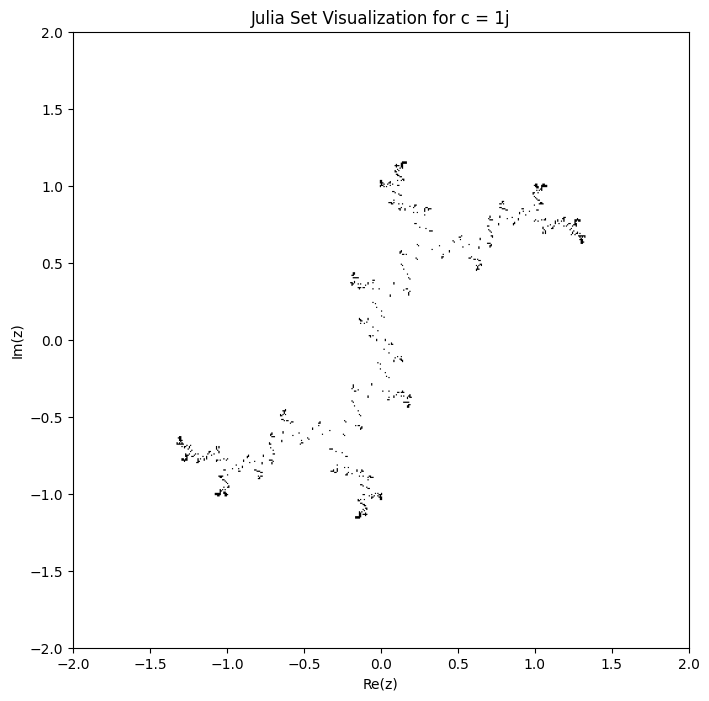

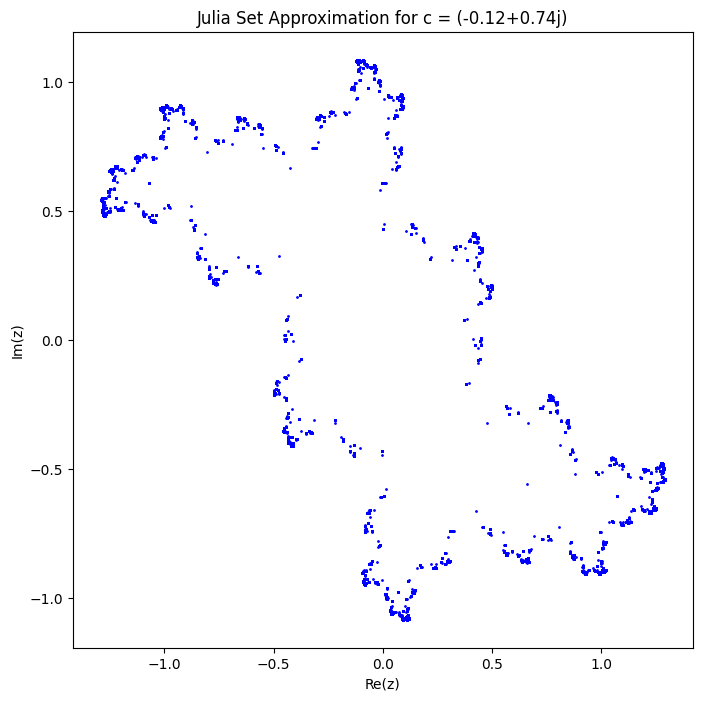

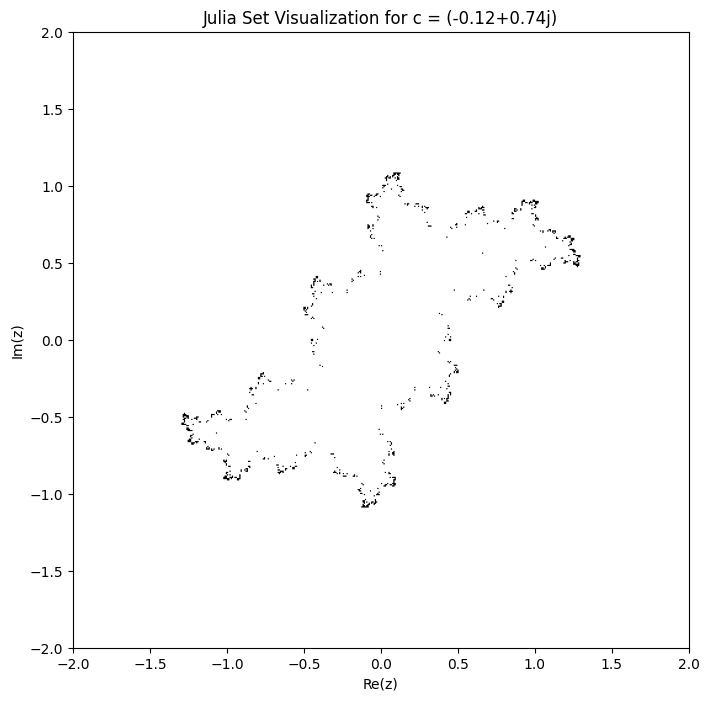

In [42]:
if __name__ == "__main__":
    c_values = [1/4, 1j, -0.12 + 0.74j]
    N = 10

    for c in c_values:
        plot_julia_set(c, N)
        imshow_julia_set(c, N)

## Features
- Fixed point detection for any complex polynomial.
- Approximation of Julia sets.
- Visualization with both scatter plots and grid-based images.
- Extendable to handle generalized polynomials.

## How to Run
1. Install required libraries: `numpy`, `matplotlib`.
2. Run the script in a Python environment.
3. Modify parameters like \( c \) and \( N \) to explore different Julia sets.
## License
MIT License
